In [1]:
!pip install autotrain-advanced

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.1/213.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.4/520.4 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 49.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━

In [2]:
script_content = """
from diffusers import StableDiffusionPipeline, StableDiffusionXLPipeline
import torch

pipeline = StableDiffusionPipeline.from_pretrained(
    "Bilal326/flynn_disneypixar", torch_dtype=torch.float16
).to("cuda")
"""

with open("download_model.py", "w") as file:
    file.write(script_content)

!python download_model.py

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]
2024-01-08 17:07:56.120542: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-08 17:07:56.120599: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-08 17:07:56.122535: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-08 17:07:57.682734: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find

In [3]:
from diffusers import StableDiffusionPipeline, StableDiffusionXLPipeline
import torch

pipeline = StableDiffusionPipeline.from_pretrained(
    "Bilal326/flynn_disneypixar", torch_dtype=torch.float16
).to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
vae/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

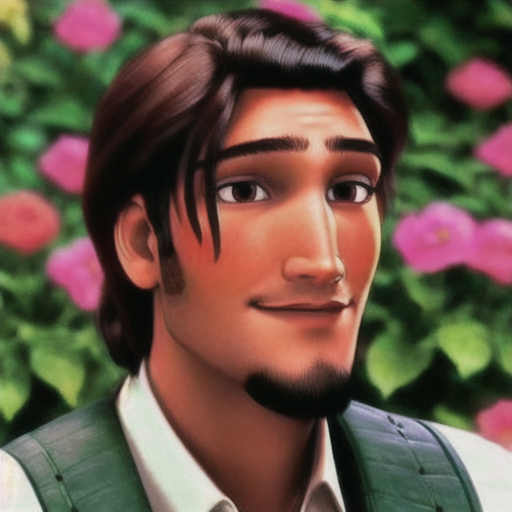

In [11]:
prompt = "photo of fljsdhn in a garden close up"
negative_prompt = "Watermark, Text, censored, deformed, bad anatomy,\
 disfigured, poorly drawn face, mutated, extra limb, ugly, poorly drawn hands, missing limb, floating limbs, disconnected limbs, disconnected head, malformed hands, \
 long neck, mutated hands and fingers, bad hands, missing fingers, cropped, worst quality, low quality, mutation, poorly drawn, huge calf, bad hands, fused hand, missing hand, \
 disappearing arms, disappearing thigh, disappearing calf, disappearing legs, missing fingers, fused fingers, abnormal eye proportion, Abnormal hands, abnormal legs, abnormal feet, \
 abnormal fingers, dull, low quality, lowres, low resolution, ugly, poor quality hands, odd position, weird position, weird hands, extra fingers, signature, basic, boring, \
 nails disconnected from fingers, large boobs, large breasts, >2 legs,, low quality, lowres, low resolution, ugly, (Watermark), (signature), (Text), censored, deformed, bad anatomy, \
 disfigured, poorly drawn face, mutated, extra limb, ugly, poorly drawn hands, missing limb, floating limbs, disconnected limbs, disconnected head, malformed hands, long neck, mutated \
 hands and fingers, bad hands, missing fingers, cropped, worst quality, low quality, mutation, poorly drawn, huge calf, bad hands, fused hand, missing hand, disappearing arms, \
 disappearing thigh, disappearing calf, disappearing legs, missing fingers, fused fingers, abnormal eye proportion, Abnormal hands, abnormal legs, abnormal feet,  \
 abnormal fingers, washed out, monochrome, greyscale"


generator = torch.Generator("cuda").manual_seed(5)
image = pipeline(prompt=prompt,
                     negative_prompt = negative_prompt,
                     guidance_scale = 5, generator=generator, num_inference_steps=100) # PLAY WITH GUIDANCE SCALE
image = image.images[0]
image

In [12]:
pipeline.load_textual_inversion("sd-concepts-library/style-spdmn")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


learned_embeds.bin:   0%|          | 0.00/4.29k [00:00<?, ?B/s]

  0%|          | 0/100 [00:00<?, ?it/s]

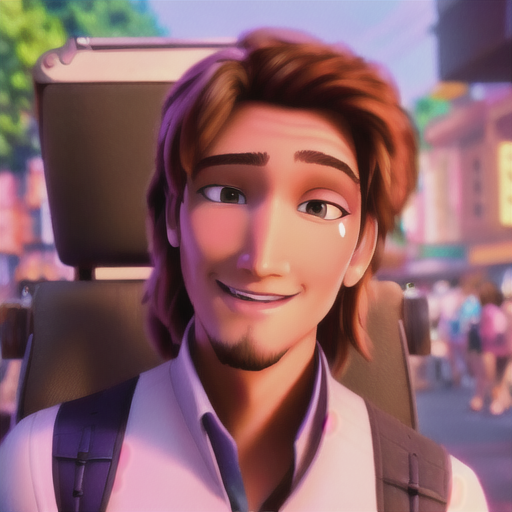

In [19]:
prompt = "fljsdhn happy in style <style-spdmn>"
negative_prompt = "Watermark, Text, censored, deformed, bad anatomy,\
 disfigured, poorly drawn face, mutated, extra limb, ugly, poorly drawn hands, missing limb, floating limbs, disconnected limbs, disconnected head, malformed hands, \
 long neck, mutated hands and fingers, bad hands, missing fingers, cropped, worst quality, low quality, mutation, poorly drawn, huge calf, bad hands, fused hand, missing hand, \
 disappearing arms, disappearing thigh, disappearing calf, disappearing legs, missing fingers, fused fingers, abnormal eye proportion, Abnormal hands, abnormal legs, abnormal feet, \
 abnormal fingers, dull, low quality, lowres, low resolution, ugly, poor quality hands, odd position, weird position, weird hands, extra fingers, signature, basic, boring, \
 nails disconnected from fingers, large boobs, large breasts, >2 legs,, low quality, lowres, low resolution, ugly, (Watermark), (signature), (Text), censored, deformed, bad anatomy, \
 disfigured, poorly drawn face, mutated, extra limb, ugly, poorly drawn hands, missing limb, floating limbs, disconnected limbs, disconnected head, malformed hands, long neck, mutated \
 hands and fingers, bad hands, missing fingers, cropped, worst quality, low quality, mutation, poorly drawn, huge calf, bad hands, fused hand, missing hand, disappearing arms, \
 disappearing thigh, disappearing calf, disappearing legs, missing fingers, fused fingers, abnormal eye proportion, Abnormal hands, abnormal legs, abnormal feet,  \
 abnormal fingers, washed out, monochrome, greyscale"


generator = torch.Generator("cuda").manual_seed(23)
image = pipeline(prompt=prompt,
                     negative_prompt = negative_prompt,
                     guidance_scale = 5, generator=generator, num_inference_steps=100) # PLAY WITH GUIDANCE SCALE
image = image.images[0]
image

  0%|          | 0/100 [00:00<?, ?it/s]

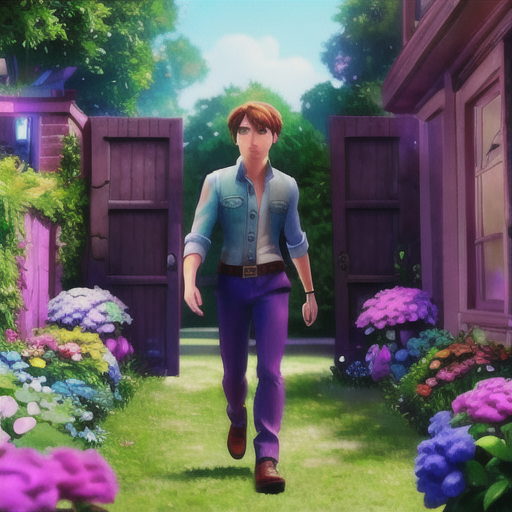

In [48]:
prompt = "fljsdhn man in style <style-spdmn> exiting the garden"
negative_prompt = "not resembling to fljsdhn, ugly, teeth, disfigured, Watermark, Text, censored, deformed, bad anatomy,\
 disfigured, poorly drawn face, mutated, extra limb, ugly, poorly drawn hands, missing limb, floating limbs, disconnected limbs, disconnected head, malformed hands, \
 long neck, mutated hands and fingers, bad hands, missing fingers, cropped, worst quality, low quality, mutation, poorly drawn, huge calf, bad hands, fused hand, missing hand, \
 disappearing arms, disappearing thigh, disappearing calf, disappearing legs, missing fingers, fused fingers, abnormal eye proportion, Abnormal hands, abnormal legs, abnormal feet, \
 abnormal fingers, dull, low quality, lowres, low resolution, ugly, poor quality hands, odd position, weird position, weird hands, extra fingers, signature, basic, boring, \
 nails disconnected from fingers, large boobs, large breasts, >2 legs,, low quality, lowres, low resolution, ugly, (Watermark), (signature), (Text), censored, deformed, bad anatomy, \
 disfigured, poorly drawn face, mutated, extra limb, ugly, poorly drawn hands, missing limb, floating limbs, disconnected limbs, disconnected head, malformed hands, long neck, mutated \
 hands and fingers, bad hands, missing fingers, cropped, worst quality, low quality, mutation, poorly drawn, huge calf, bad hands, fused hand, missing hand, disappearing arms, \
 disappearing thigh, disappearing calf, disappearing legs, missing fingers, fused fingers, abnormal eye proportion, Abnormal hands, abnormal legs, abnormal feet,  \
 abnormal fingers, washed out, monochrome, greyscale"


generator = torch.Generator("cuda").manual_seed(2)
image = pipeline(prompt=prompt,
                     negative_prompt = negative_prompt,
                     guidance_scale = 7, generator=generator, num_inference_steps=100)
image = image.images[0]
image